In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
# loading the csv data to a pandas dataframe
gold_data = pd.read_csv(r'D:\Projects\Finance\Gold Price (2013-2023).csv')

In [3]:
# print first five rows in the dataframe
gold_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


In [4]:
# print the last five rows of the dataframe
gold_data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%
2582,01/02/2013,"1,689.90","1,675.80","1,695.00","1,672.10",0.06K,0.78%


In [5]:
# number of rows and columns
gold_data.shape

(2583, 7)

In [6]:
# getting some information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [7]:
# checking number of missing values
gold_data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
dtype: int64

In [8]:
# statistical measures of data
gold_data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2583,2583,2583,2583,2583,2578,2583
unique,2583,2072,2061,2044,2019,1550,474
top,01/02/2013,"1,294.30","1,284.00","1,304.80","1,190.00",0.02K,0.00%
freq,1,5,5,6,5,48,29


Correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr

In [10]:
# constructing a heatmap tp understand the correlation
#plt.figure(figsize = (8,8))
#sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap ='Blues')

In [11]:
# correlation values of GLD
#print(correlation['GLD'])

In [12]:
print(gold_data.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


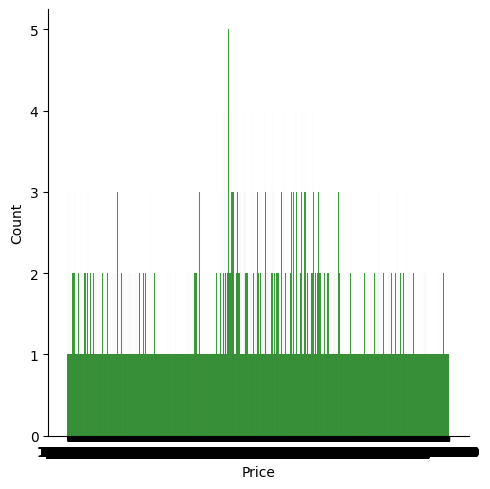

In [13]:
# checking the distribution of the GLD price
sns.displot(gold_data['Price'], color='green')

Splitting the features and target

In [14]:
X = gold_data.drop(['Date', 'Price'], axis=1)
Y = gold_data['Price']

In [15]:
print(X)

          Open      High       Low     Vol. Change %
0     1,821.80  1,832.40  1,819.80  107.50K    0.01%
1     1,812.30  1,827.30  1,811.20  105.99K    0.56%
2     1,822.40  1,822.80  1,804.20  118.08K   -0.40%
3     1,808.20  1,841.90  1,808.00  159.62K    0.74%
4     1,805.80  1,811.95  1,805.55      NaN    0.30%
...        ...       ...       ...      ...      ...
2578  1,651.50  1,662.60  1,648.80    0.13K    0.97%
2579  1,657.30  1,663.80  1,645.30    0.09K   -0.16%
2580  1,664.40  1,664.40  1,630.00    0.31K   -1.53%
2581  1,688.00  1,689.30  1,664.30    0.19K   -0.85%
2582  1,675.80  1,695.00  1,672.10    0.06K    0.78%

[2583 rows x 5 columns]


In [16]:
print(Y)

0       1,826.20
1       1,826.00
2       1,815.80
3       1,823.10
4       1,809.70
          ...   
2578    1,663.20
2579    1,647.20
2580    1,649.90
2581    1,675.60
2582    1,689.90
Name: Price, Length: 2583, dtype: object


Splitting into Training and Test Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training:
Random Forest Regressor

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
print(X_train.dtypes)

Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [20]:
print(X_train.head())
print(X_train.dtypes)

          Open      High       Low     Vol. Change %
1342  1,292.00  1,292.90  1,279.30  314.81K   -0.74%
799   1,461.20  1,472.90  1,459.10  272.34K    0.81%
1543  1,189.10  1,199.80  1,178.80    0.49K    0.94%
2026  1,213.70  1,215.90  1,205.30    0.01K    0.25%
1931  1,159.50  1,165.00  1,158.10    0.19K   -0.11%
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [22]:
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif '%' in value:
            return float(value.replace('%', '')) / 100  # Convert percentages to decimals
    try:
        return float(value)  # Convert directly if possible
    except ValueError:
        return np.nan  # Return NaN for invalid values

In [23]:
X = gold_data.drop(columns=['Price'], axis=1)  # Features
Y = gold_data['Price']  # Target variable

# Apply the conversion function to handle strings in X and Y
X = X.applymap(convert_to_float)
Y = Y.apply(convert_to_float)

# Handle missing values by filling them with the column mean
X = X.fillna(X.mean())
Y = Y.fillna(Y.mean())

C:\Users\Addmin\AppData\Local\Temp\ipykernel_10664\617650003.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(convert_to_float)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
regressor.fit(X_train, Y_train)

# Check model performance on the test set
test_score = regressor.score(X_test, Y_test)
print(f"Model Test Score: {test_score}")

Model Test Score: 0.9995070222112454


In [25]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [26]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[1861.734  1877.615  1337.203  1500.788  1966.448  1196.912  1576.129
 1295.6    1066.791  1297.132  1305.402  1210.225  1199.675  1162.722
 1087.512  1200.094  1786.63   1230.527  1572.112  1421.917  1422.892
 1840.086  2006.355  1202.825  1316.325  1290.486  1648.702  1671.812
 1213.943  1897.163  1248.553  1321.429  1370.899  1278.465  1308.647
 1873.589  1743.389  1327.455  1640.55   1167.937  1202.272  1744.783
 1893.093  1276.692  1333.038  1201.627  1259.709  1349.244  1205.778
 1844.069  1127.053  1268.987  1900.97   1783.703  1193.182  1750.642
 1576.036  1409.093  1184.634  1341.846  1295.198  1333.158  1673.069
 1273.772  1151.943  1323.046  1729.837  1953.625  1181.036  1257.401
 1582.62   1657.447  1469.472  2043.902  1214.868  1268.02   1232.9
 1798.711  1217.916  1408.686  1277.747  1889.864  1229.827  1936.51
 1080.105  1732.677  1153.686  1686.926  1307.358  1551.389  1404.374
 1949.629  1649.812  1278.026  1811.097  1490.038  1289.606  1568.99
 1334.946  1215.595  115

In [28]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9995070222112454


Compare the actual values and predicted values in a plot

In [29]:
Y_test = list(Y_test)

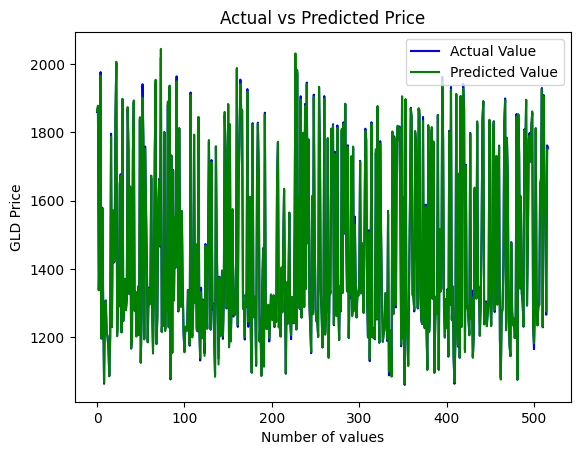

In [30]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on the test set
Y_pred = regressor.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R²): {r2}")


Model Performance Metrics:
Mean Absolute Error (MAE): 3.8171373307542775
Mean Squared Error (MSE): 33.630900916826974
Root Mean Squared Error (RMSE): 5.79921554322884
R-squared Score (R²): 0.9995070222112454


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import os

# Generate dummy dataset (replace with real data)
np.random.seed(42)
data = np.random.rand(100, 1)  # 100 samples, 1 feature

# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

X, y = [], []
for i in range(10, len(data_scaled)):  # Creating sequences of 10 timesteps
    X.append(data_scaled[i-10:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshaping for LSTM

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X, y, epochs=10, batch_size=1, verbose=1)

# Save the Model
model.save('model_lstm.h5')
print("Model saved successfully as 'model_lstm.h5'.")

# Check if file exists
if os.path.exists("model_lstm.h5"):
    print("File exists. Now loading...")

    # Load the model
    loaded_model = load_model('model_lstm.h5')
    print("Model loaded successfully.")
else:
    print("Error: Model file not found!")


c:\Users\jiten\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1367
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1176
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1047
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0898
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0990
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0995
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0958
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1057
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1045
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0919


Model saved successfully as 'model_lstm.h5'.
File exists. Now loading...
Model loaded successfully.


In [4]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a dummy dataset (replace this with your actual dataset)
np.random.seed(42)
data_size = 500
X = np.random.rand(data_size, 5)  # 500 samples, 5 features
y = np.random.randint(0, 2, size=(data_size,))  # Binary classification (0 or 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss')

# Train the model
model_xgb.fit(X_train, y_train)

# Evaluate the model
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Save the model as JSON
model_xgb.save_model("model_xgb.json")
print("Model saved successfully as 'model_xgb.json'.")


c:\Users\jiten\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:14:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.49
Model saved successfully as 'model_xgb.json'.


In [5]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate a dummy dataset (Replace this with your actual dataset)
np.random.seed(42)
data_size = 500
X = np.random.rand(data_size, 5)  # 500 samples, 5 features
y = np.random.randint(0, 2, size=(data_size,))  # Binary classification (0 or 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform test set

# Save the scaler to a file
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved successfully as 'scaler.pkl'.")


Scaler saved successfully as 'scaler.pkl'.
